In [588]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from math import pi


In [589]:
def f(x):
    return (x*np.sin(10*x*np.pi)+1)  # function to be MAXIMIZED

No handles with labels found to put in legend.


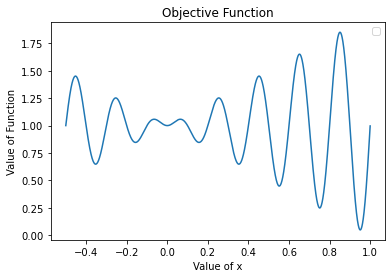

In [590]:
x = np.arange(-0.5, 1, 0.0001)
y = f(x)
plt.plot(x,y)
plt.xlabel('Value of x')
plt.ylabel('Value of Function')
plt.title('Objective Function')
plt.legend()
plt.show()

In [591]:
def initialize_population(population_size):
    population = []
    for j in range(population_size):
        x1 = np.random.randint(-1,1)   #Value that will determine the sign of the candidate solution
        x2 = np.random.randint(low=0, high=9, size = 4)
        x = np.append(x1,x2)
        population = np.append(population,x)
    population = np.split(population, population_size)
    return population

#initialize_population(100)

In [592]:
def double_point_crossover(parents, num_offspring):
    children = []
    for i in range(int(num_offspring/2)):
        index1 = np.random.randint(low=0, high=99)
        index2 = np.random.randint(low=0, high=99)
        parent1 = parents[index1]
        parent2 = parents[index2]
        #print(i)
        offspring1 = np.append(parent1[0:2],parent2[2:4])
        offspring1 = np.append(offspring1 ,parent1[4:])
        offspring2 = np.append(parent2[0:2],parent1[2:4])
        offspring2 = np.append(offspring2, parent2[4:])
        children = np.append(children, offspring1)
        children = np.append(children, offspring2)
    children = np.split(children, num_offspring)
    return children


In [593]:
def mutation(children, prop):
    num_offspring = len(children)
    for i in range(num_offspring):
        for j in range(1,5):
            probability = np.random.uniform(low=0, high=1)
            if probability < prop:
                random_value = np.random.randint(low=0, high=9)
                children[i][j] = random_value
    return children

In [594]:
def rtselection(population,children):
    populationf = []
    for ind in population:
        if ind[0]>=0:
            sign = 1
        else:
            sign = -1
        populationf.append(sign*float("0."+str((int(ind[1])))+str((int(ind[2])))
                                      +str((int(ind[3])))+str((int(ind[4])))))

    for c in range(len(children)):
        if children[c][0]>=0:
            sign = 1
        else:
            sign = -1
        child = sign*float("0."+str((int(children[c][1])))+str((int(children[c][2])))+
                           str((int(children[c][3])))+str((int(children[c][4]))))
        
        pc = []
        for i in populationf: 
            pc.append(abs(i - child))
        
        pcmin, k = 10000, 0
        for i in range(len(pc)):
            if pcmin > pc[i]:
                k = i
                pcmin = pc[i]
        if f(populationf[k]) < f(child):
            populationf[k] = child
            population[k] = children[c]
    
    return population  

In [595]:
def evaluate_fitness(population):
    population_size = len(population)
    fitness = []
    bestx, fitx = -1, 0
    for j in range(population_size):
        ind = population[j]
        if ind[0]>=0:
            sign = 1
        else:
            sign = -1
        x = sign*float("0"+"."+str((int(ind[1])))+str((int(ind[2])))
                       +str((int(ind[3])))+str((int(ind[4]))))
        if float(x)<-0.5 or float(x)>1: 
            fit = -1000       
        else:
            fit = f(x)
        fitness = np.append(fitness,fit)    
    return fitness

In [596]:
def genetic_algorithm(num_generations, population_size, prop=0.5):
    population = initialize_population(population_size)
    
    for gen in range(num_generations):
        children = double_point_crossover(population, num_offspring = int(population_size))
        children = mutation(children,prop=0.5)
        population = rtselection(population,children)
    fitness = evaluate_fitness(population)
    
    return population, fitness 

No handles with labels found to put in legend.


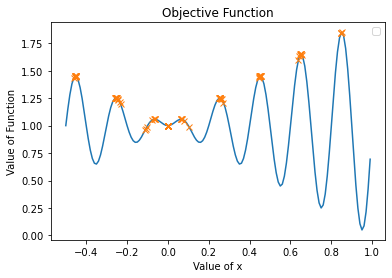

In [597]:
elites, elites_fx = genetic_algorithm(num_generations = 100, population_size=100, prop = 0.01)
pop = []
for ind in elites:
    if ind[0]>=0:
        sign = 1
    else:
        sign = -1
    pop.append(sign*float("0."+str((int(ind[1])))+str((int(ind[2])))+str((int(ind[3])))+str((int(ind[4])))))

x = np.arange(-0.5, 1, 0.01)
y = f(x)

for i in range(len(pop)):
    if elites_fx[i] < 0:
        elites_fx[i] = 1
        pop[i] = 0

ax = plt.subplot(111)
ax.plot(x,y)
ax.plot(pop,elites_fx,'x')
ax.set_xlabel('Value of x')
ax.set_ylabel('Value of Function')
ax.set_title('Objective Function')
ax.legend()
plt.show() 